In [1]:
using DifferentialEquations
using Plots

In [2]:
function lorenz!(du,u,p,t)
    x,y,z = u
    σ,ρ,β = p
    
    du[1] = dx = σ*(y-x)
    du[2] = dy = x*(ρ-z) - y
    du[3] = dz = x*y - β*z
end

lorenz! (generic function with 1 method)

In [3]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,1.0)
param=[10.0, 28.0, 8/3]
prob = ODEProblem(lorenz!,u0,tspan,param)
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 28-element Array{Float64,1}:
 0.0
 3.5678604836301404e-5
 0.0003924646531993154
 0.0032624077544510573
 0.009058075635317072
 0.01695646895607931
 0.0276899566248403
 0.041856345938267966
 0.06024040228733675
 0.08368539694547242
 0.11336497050342806
 0.14862178548871152
 0.18703974465019643
 ⋮
 0.37221152547525677
 0.4201372705729432
 0.4637203592547958
 0.5049460289663918
 0.5570622537949965
 0.6068387449874374
 0.6690203938696947
 0.7276640840586802
 0.798854234447563
 0.8763207996400417
 0.9661628933695969
 1.0
u: 28-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034242593451028745]
 [0.84833098777

In [134]:
u0=sol.u[end]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!,u0,tspan,param,saveat = 0.01)
sol=solve(prob)

retcode: Success
Interpolation: 1st order linear
t: 10001-element Array{Float64,1}:
   0.0
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1
   0.11
   0.12
   ⋮
  99.89
  99.9
  99.91
  99.92
  99.93
  99.94
  99.95
  99.96
  99.97
  99.98
  99.99
 100.0
u: 10001-element Array{Array{Float64,1},1}:
 [-9.141754452933187, -14.60723940198661, 18.681774823900792]
 [-9.69538469020005, -15.293713781166023, 19.580225226983725]
 [-10.259260705020754, -15.9271485676295, 20.602902278401025]
 [-10.826303669856717, -16.48475829823421, 21.748322986821563]
 [-11.38783173478963, -16.942246110660953, 23.009666168758187]
 [-11.933577328002608, -17.27388070701608, 24.374753067405514]
 [-12.45189547346267, -17.454268410236214, 25.824894905452222]
 [-12.929605088810995, -17.4595918427974, 27.334024052492904]
 [-13.353116796305795, -17.271719590393875, 28.86975863915936]
 [-13.708710480035611, -16.87918859325469, 30.393485736065916]
 [-13.983283159553077, -16.279108994755656, 3

In [9]:
gr()

Plots.GRBackend()

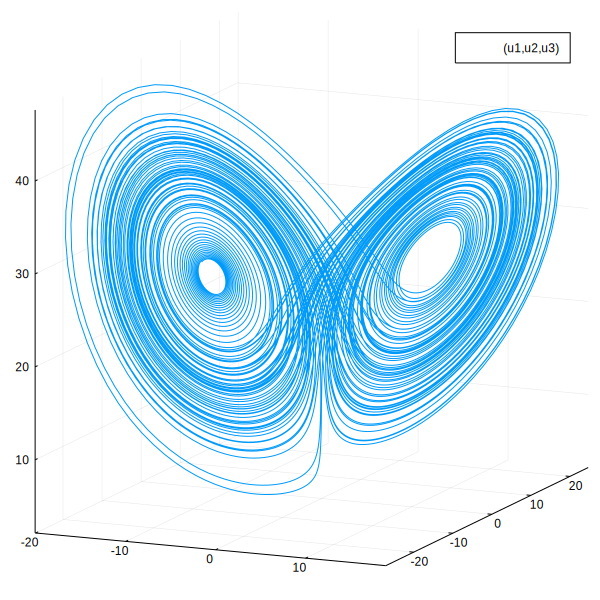

In [10]:
plot(sol,vars=(1,2,3),size=(600,600))


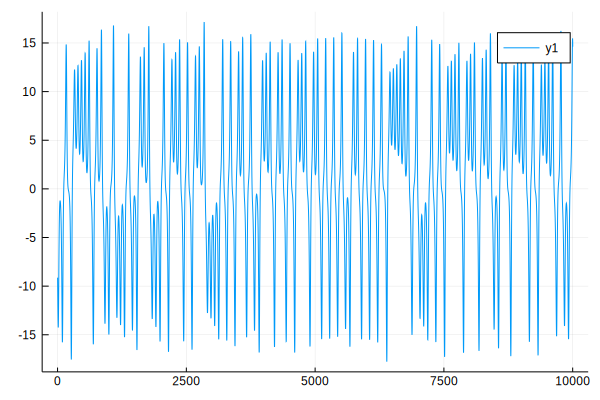

In [153]:
z=sol[1,:]+randn(size(sol[1,:]))*0.01
plot(z)

In [72]:
cd("/Users/michael/work/GitHub/place")

In [143]:
include("Place.jl")

Main.Place

In [154]:
zin=z;

In [167]:
options=Dict("stopstep"=>3,
    "testdatum"=> 5000,
    "functions"=>(tophat,cubic,gaussian),
    "embedding" => [0, 20, 40, 60],#([0, 1, 2, 3],[0, 20, 40, 80],[0, 20, 40],[0, 20],[0, 1, 20]),#([0, 5, 10], [0, 1, 2], [0, 5]),
    "penalty"=> :(dx*log(mss)+nk*log(dx)))

Dict{String,Any} with 5 entries:
  "penalty"   => :(dx * log(mss) + nk * log(dx))
  "stopstep"  => 3
  "embedding" => [0, 20, 40, 60]
  "testdatum" => 5000
  "functions" => (tophat, cubic, gaussian)

In [146]:
size(z)

(10001,)

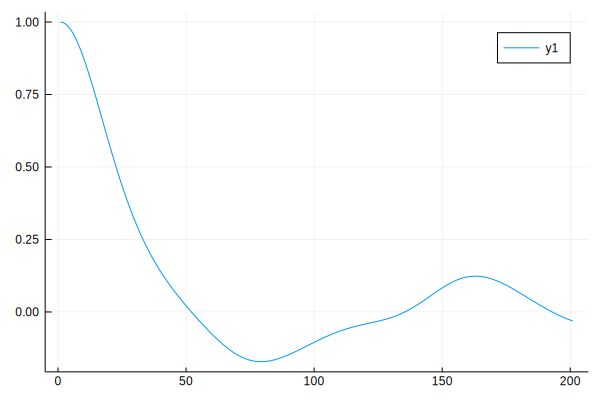

In [160]:
plot(autocor(z,0:200))

In [168]:
mymodel, X, z = Place.buildmodel(zin,options)

*MSS=61.92462697264189 DL=255.7918689056772 size=1
*MSS=0.20178269309275398 DL=-93.52352631799756 size=1
MSS=0.19962996544979228 DL=-90.06693000265079 size=2
*MSS=0.10064484336224196 DL=-131.84385132739567 size=2
MSS=0.09888621077002187 DL=-128.80829244712788 size=3
*MSS=0.08527683325609611 DL=-137.84037802478 size=3
MSS=0.08500134985961873 DL=-133.92688120021452 size=4
MSS=0.08013881017952572 DL=-137.52020080347077 size=4
MSS=0.08011638915754965 DL=-133.42639574399303 size=5


(Main.Place.PlaceModel(Main.Place.BasisFunc[], [1.045276693651558, -0.08052762862300153, 0.025635898057470786], StatsBase.params, Any[62, 46, 32], [0, 20, 40, 60]), [-9.128710699996391 -9.687744024891566 … 1.9679802512088724 1.8386939838568725; -9.687744024891566 -10.269381481618161 … 1.8386939838568725 1.7521229888382583; … ; -1.7940273463711798 -1.9095796663477904 … 11.242187461964706 10.33895380781598; -1.9095796663477904 -2.0316753030983357 … 10.33895380781598 9.434422924016468], [-2.0316753030983357, -2.1730135093478693, -2.3321938401521836, -2.480198253814168, -2.6966034252084077, -2.9028658276970667, -3.1214815503607447, -3.3669054848590263, -3.6143392670450165, -3.9131102278236325  …  15.170207883357453, 14.781259095163247, 14.261556770607783, 13.647433964358264, 12.912061966495958, 12.0964524650756, 11.242187461964706, 10.33895380781598, 9.434422924016468, 8.557400479409623])

In [77]:
ϕ, offset = Place.placebo(X, mymodel.rbf)

([1.0 -9.457992850443873 … -8.503674890345621 -7.784637510428791; 1.0 -8.871369372217801 … -7.784637510428791 -7.522774146718467; … ; 1.0 4.675771771099377 … 2.362666277039097 2.8615323546171383; 1.0 2.63769640080479 … 2.8615323546171383 4.636887591809607], 5)

In [169]:
size(mymodel.λ)

(3,)

In [78]:
myλ = ϕ\z

5-element Array{Float64,1}:
 -0.04134719371010796
 -0.38673059353174144
  1.523163477074697
 -2.5927651746430915
  2.4084430442398252

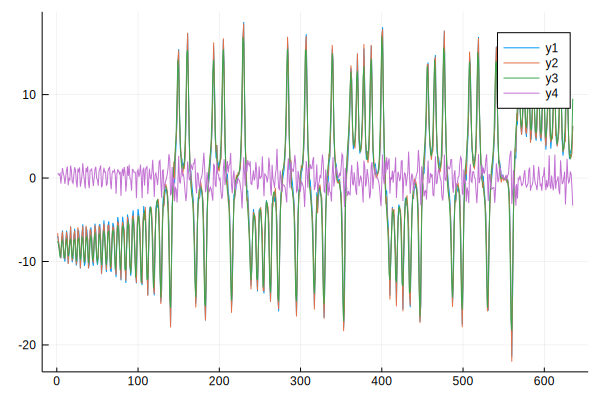

In [79]:
plot(ϕ[:,mymodel.basis]*mymodel.λ)
plot!(ϕ*myλ)
plot!(z)
plot!(ϕ[:,mymodel.basis]*mymodel.λ-z)

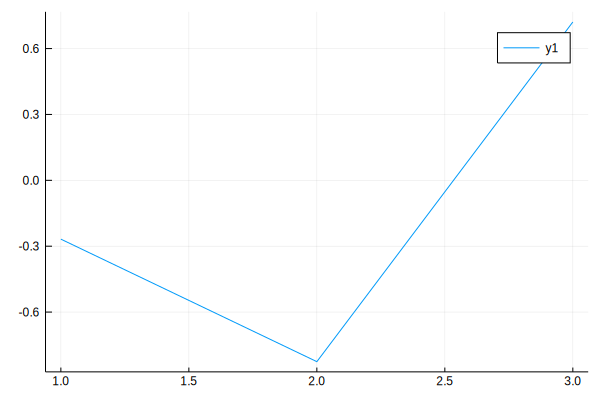

In [80]:
plot(mymodel.λ-myλ[mymodel.basis])

In [81]:
yt,yp,ep = Place.predict(mymodel,z)

([-9.619310560019759, -7.441272873911153, -6.276548772750019, -7.885439237543936, -9.483386191967012, -10.01789385820154, -7.799299933799858, -6.2992490340137195, -7.148660740302715, -10.228537368875205  …  5.078704242563113, 11.818718047746842, 14.99678595052144, 9.012018799303963, 4.113255074562069, 2.2771573125162696, 3.0692080090504366, 3.380414168252548, 3.5419662637909477, 6.2166274889234], [-8.95392133692743, -7.668273544694619, -7.472701964492269, -8.4669968185229, -9.649873503382366, -9.323885566799927, -7.952724105130816, -7.256722375667315, -8.533589844889203, -9.365508365793758  …  8.251695999839422, 12.766714864596107, 12.686094505546492, 8.856275810315005, 4.675771771099377, 2.63769640080479, 2.362666277039097, 2.8615323546171383, 4.636887591809607, 9.51621894726553], [-0.6653892230923297, 0.22700067078346642, 1.1961531917422503, 0.5815575809789628, 0.166487311415354, -0.6940082914016141, 0.15342417133095765, 0.9574733416535954, 1.3849291045864884, -0.8630290030814471  … 

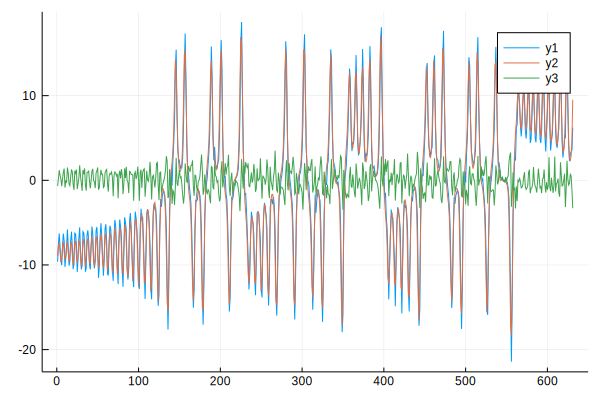

In [82]:
plot(yt)
plot!(yp)
plot!(ep)

In [83]:
yp=Place.freerun(mymodel,z)

632-element Array{Float64,1}:
   -9.619310560019759
   -8.961550538255945
   -9.623738905232301
   -4.346008516565188
  -10.526621727902029
   -4.199195207414718
  -19.80497711130031
    7.472892137900191
  -28.481931066045743
   33.292856890307675
  -76.24039974198425
   92.5221980788489
 -176.4436979708267
    ⋮
   -1.1438404523980585e131
    1.863156491932227e131
   -3.034821951043541e131
    4.943301496367675e131
   -8.051948377264228e131
    1.311550038324949e132
   -2.13633200616051e132
    3.479786746355946e132
   -5.668087060061916e132
    9.232522928045846e132
   -1.5038491595780313e133
    0.0

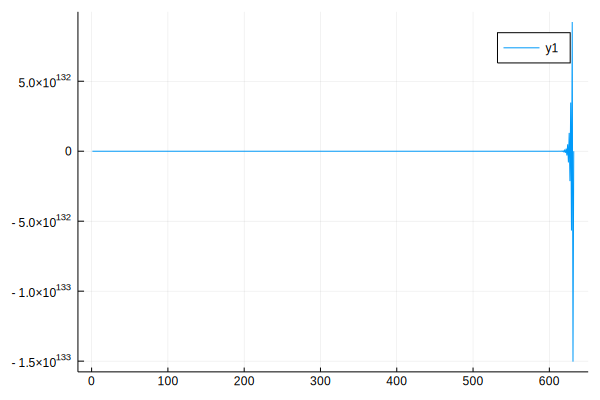

In [84]:
plot(yp)

In [22]:
infinite

UndefVarError: UndefVarError: infinite not defined

In [23]:
Inf

Inf

In [150]:
function tophat(x,p)
	    return exp.(-x.^p)
	end
	function dtophat(x,p)
    	return -p* (x.^(p-1)) .* exp.(-x.^p)
	end
	function tophat()
		return [1.1 5;]
	end

	function gaussian(x) 
    	return exp.(-x.^2)
	end
	function gaussian()
		return []
	end
	function dgaussian(x) 
    	return -2*x .* exp.(-x.^2)
	end

	function cubic(x)
		return x.^3
	end
	function cubic()
		return []
	end
	function dcubic(x)
		return 3 .* x.^2
	end


dcubic (generic function with 1 method)

In [156]:
using StatsBase

In [206]:
function itmap(mapfn,x0,it)
    if x0 isa Array
        x0=x0[:]
    end
    dx=length(x0)
    for i in 1:1000
        x0=mapfn(x0)
    end
    x=Array{Float64,2}(undef,dx,it)
    for i in 1:it
        x0=mapfn(x0)
        x[:,i]=x0
    end
    return x
end


itmap (generic function with 1 method)

In [226]:
x=itmap(henonmap,[0.5 0.5],10000)

2×10000 Array{Float64,2}:
 -0.309401   1.16839    -1.00401   …  0.588626  0.700387  0.489828
  0.30241   -0.0928202   0.350517     0.18546   0.176588  0.210116

In [181]:
function logmap(x)
    return 4*x*(1-x)
end


logmap (generic function with 1 method)

In [212]:
function henonmap(x)
    y=Array{Float64,1}(undef,2)
    a=1.4
    b=0.3
    y[1]=1-a*x[1]^2+x[2]
    y[2]=b*x[1]
    return y
end

henonmap (generic function with 1 method)

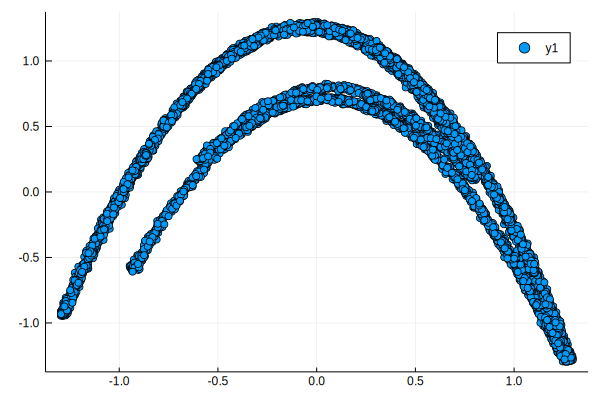

In [222]:
plot(x[1:end-1],x[2:end],linetype=:dots)

In [227]:
#x=x[1,:]+randn(size(x[1,:]))*0.01
zin=x[1,:]

10000-element Array{Float64,1}:
 -0.30940078675508564
  1.168389279248323
 -1.0040071470339078
 -0.06072570803873667
  0.6936351996262994
  0.3082005813635164
  1.0751079221939566
 -0.5257396877008342
  0.9355692697449078
 -0.3831277081976784
  1.0751692038191447
 -0.7333226560368342
  0.5696837961460595
  ⋮
  0.43398808692977087
  0.9437993203574778
 -0.11686359387120057
  1.2640198567057532
 -1.2719037555663661
 -0.8856288717816312
 -0.47964502461639663
  0.41222824897054156
  0.6182015116660347
  0.588626122054524
  0.700387457308884
  0.48982821011851196

In [221]:
zin=x;

In [263]:
options=Dict("stopstep"=>3,
    "testdatum"=> 5000,
    "functions"=>(tophat,cubic,gaussian),
    "embedding" => ([0, 1],[0,1,2],[0,1,2,3]),
 #   "penalty"=> :(dx*log(mss)+nk*log(dx))
    "penalty"=> :(-nk*(nk<7))
)

Dict{String,Any} with 5 entries:
  "penalty"   => :(-nk * (nk < 7))
  "stopstep"  => 3
  "embedding" => ([0, 1], [0, 1, 2], [0, 1, 2, 3])
  "testdatum" => 5000
  "functions" => (tophat, cubic, gaussian)

In [264]:
mymodel, X, z = Place.buildmodel(zin,options);

*MSS=0.5771757797173374 DL=-1 size=1
MSS=0.5833938655986795 DL=-1 size=1
*MSS=0.5016752971409345 DL=-2 size=2
*MSS=0.5016579485977347 DL=-3 size=3
MSS=0.49931890816839636 DL=-3 size=3
*MSS=0.10257616360050761 DL=-4 size=4
MSS=0.4391552187036303 DL=-4 size=4
*MSS=0.04578686374230744 DL=-5 size=5
MSS=0.4232820372360807 DL=-5 size=5
*MSS=0.04098009721611418 DL=-6 size=6
MSS=0.423173283848561 DL=-6 size=6
MSS=0.02518246904895548 DL=0 size=7
MSS=0.2902402420901435 DL=0 size=7


In [265]:
yt,yp,ep=Place.predict(mymodel,zin);

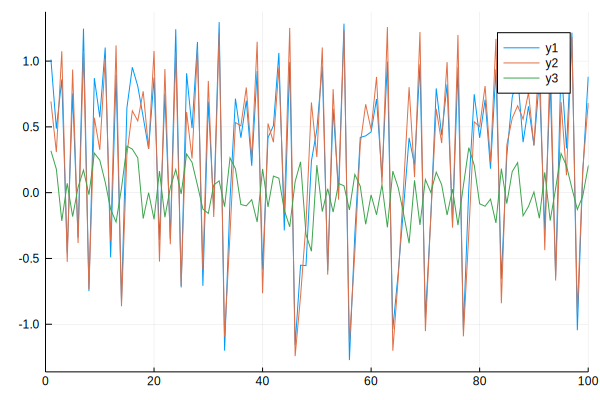

In [266]:
plot(yt)
plot!(yp)
plot!(ep,xlimit=(0,100))